<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Gradua%C3%A7%C3%A3o/2024/20240312_Exerc%C3%ADcios1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exercícios Amostragem: Aula 20/02/2024

De forma similar ao que fizemos em aula, dia 05-fev-2024 (veja o arquivo  no repo https://github.com/diogenesjusto/FIAP), faça uma geração de amostra com a seguinte base de dados:

https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/classifier.csv

A entrega deverá ser feita via um notebook python no portal por um dos representantes do grupo (por favor, incluir o nome e Rm de todos alunos do grupo no notebook).

A análise deverá conter ao menos:
A geração de uma amostra não aleatória de 3000 linhas e a demonstração de que não é adequada utilizá-la
A geração de uma amostra aleatória de 3000 linhas e a demonstração que é adequado utilizá-la como amostra representativa


In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/classifier.csv")

print('População')
print(df[['Net']].mean())
print(df[['Net']].median())
print(df[['Net']].std())

a1 = df.iloc[0:3000,:]

print('----------------------')
print('Amostra 1')
print(a1[['Net']].mean())
print(a1[['Net']].median())
print(a1[['Net']].std())
# Conclusão: variáção muito grande no Std, Desvio Padrão (cerca de 10%)

a2 = df.sample(3000, random_state=1)
print('----------------------')
print('Amostra 2, aleatória')
print(a2[['Net']].mean())
print(a2[['Net']].median())
print(a2[['Net']].std())
# Conclusão: amostra 2 ok.

População
Net    1141.442615
dtype: float64
Net    202.0
dtype: float64
Net    4102.822509
dtype: float64
----------------------
Amostra 1
Net    1166.939
dtype: float64
Net    205.5
dtype: float64
Net    3625.373335
dtype: float64
----------------------
Amostra 2, aleatória
Net    1194.756333
dtype: float64
Net    206.0
dtype: float64
Net    4283.784548
dtype: float64


array([[<Axes: title={'center': 'Net'}>]], dtype=object)

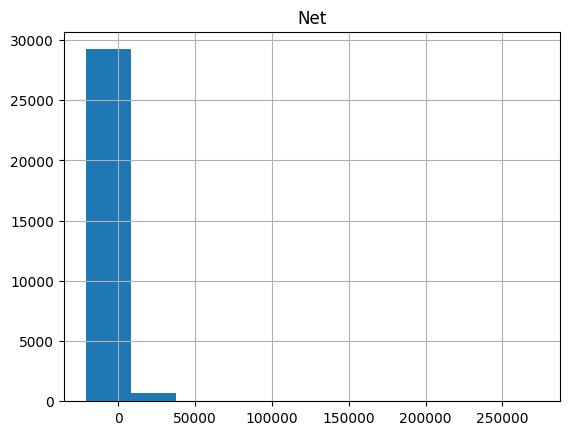

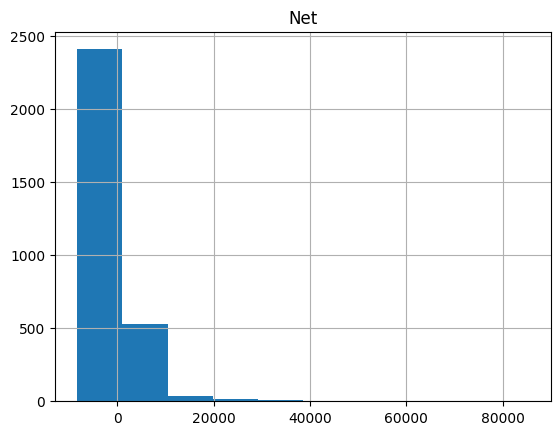

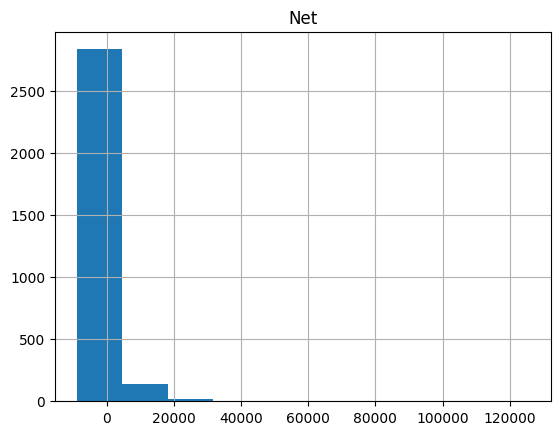

In [13]:
#histogramas:
df[['Net']].hist()
a1[['Net']].hist()
a2[['Net']].hist()

# 2. Exercício Série Temporal

De forma similar ao que fizemos em aula, dia 27-fev-2024 (veja o arquivo  no repo https://github.com/diogenesjusto/FIAP), acesse a base de dados de PIB abaixo e execute as atividades listadas:
https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv

A entrega deverá ser feita via um notebook python no portal por um dos representantes do grupo (por favor, incluir o nome e Rm de todos alunos do grupo no notebook).

A análise deverá conter:
Avaliar que há 1 valor (para PIB) para cada unidade de tempo;
Analisar (graficamente) se há sazonalidades na série do PIB;
Analisar se há uma tendência/ruído
Dica: opcional, pode ser utilizada alguma função/pacote de decomposição de série temporal
Análise de correlação entre a variável PIB e as 12 variáveis de tráfego
Incluir uma visualização gráfica da matriz de correlação entre PIB e as variáveis de tráfego


In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")
print("Tamanho dataset: (linhas, colunas)")
print(df.shape)

print("Primeiro mês/ano:")
print(df[['ANO_MES']].head(1))
print("Último mês/ano:")
print(df[['ANO_MES']].tail(1))
print("---------------------------")

# Total: 11 anos e meio. 11.5
# 138/12 = 11.5. Ou seja, temos 1 valor em cada linha para cada mês.

# Há valores nulos?
df['PIB'].isnull().sum()

# Podemos testar/contar outliers tbm!

Tamanho dataset: (linhas, colunas)
(138, 38)
Primeiro mês/ano:
  ANO_MES
0  jan/04
Último mês/ano:
    ANO_MES
137  jun/15
---------------------------


0

<Axes: >

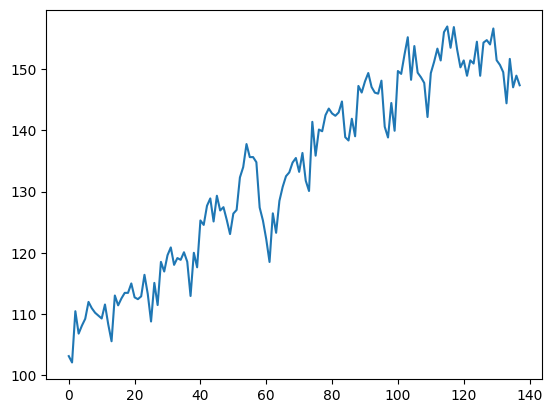

In [42]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#series = df['PIB']
#result = seasonal_decompose(series, model='additive')
df['PIB'].plot()

In [43]:
# Matrix correlação
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
Unnamed: 0,1.000000,0.957066,0.913916,0.852357,0.935634,0.939092,0.837590,0.948227,0.786435,0.810746,...,0.964608,0.965749,0.969321,0.970948,0.972145,0.973129,0.973266,0.973636,0.973899,0.974167
PIB,0.957066,1.000000,0.875316,0.945026,0.923355,0.912627,0.940794,0.951017,0.733248,0.839292,...,0.954370,0.936421,0.934392,0.920989,0.927681,0.929732,0.940744,0.951037,0.952769,0.969757
BRL,0.913916,0.875316,1.000000,0.767459,0.991358,0.993062,0.746181,0.972831,0.955565,0.718522,...,0.911265,0.926402,0.921127,0.901017,0.902267,0.875838,0.870883,0.857206,0.850000,0.891312
BRP,0.852357,0.945026,0.767459,1.000000,0.844730,0.820792,0.995076,0.888951,0.592349,0.902659,...,0.869217,0.838323,0.840009,0.810519,0.823776,0.830495,0.847675,0.870530,0.868061,0.895366
BRT,0.935634,0.923355,0.991358,0.844730,1.000000,0.996182,0.826268,0.993391,0.919659,0.782612,...,0.937902,0.944138,0.940047,0.917070,0.920494,0.899675,0.899064,0.892115,0.885591,0.925716
SLP,0.939092,0.912627,0.993062,0.820792,0.996182,1.000000,0.802807,0.990845,0.919804,0.759298,...,0.930192,0.942546,0.936865,0.918122,0.922728,0.902186,0.901521,0.892048,0.888916,0.926384
SPP,0.837590,0.940794,0.746181,0.995076,0.826268,0.802807,1.000000,0.875741,0.570393,0.866241,...,0.863373,0.829763,0.826466,0.796421,0.805556,0.813273,0.832328,0.857006,0.859741,0.885294
SPT,0.948227,0.951017,0.972831,0.888951,0.993391,0.990845,0.875741,1.000000,0.875226,0.808810,...,0.947928,0.950763,0.945137,0.923030,0.928683,0.913427,0.917113,0.914578,0.912607,0.948812
PRL,0.786435,0.733248,0.955565,0.592349,0.919659,0.919804,0.570393,0.875226,1.000000,0.556847,...,0.803784,0.827533,0.821269,0.804295,0.791361,0.757967,0.739412,0.712972,0.696890,0.744152
PRP,0.810746,0.839292,0.718522,0.902659,0.782612,0.759298,0.866241,0.808810,0.556847,1.000000,...,0.784043,0.761675,0.782756,0.771164,0.795845,0.814412,0.818836,0.835534,0.809057,0.819235


In [45]:
# Matriz de correlação: visualização gráfica
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-45-699201837c09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,Unnamed: 0,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,PRT,RJL,RJP,RJT,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,PIBi1,PIBi2,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
Unnamed: 0,1.000000,0.957066,0.913916,0.852357,0.935634,0.939092,0.837590,0.948227,0.786435,0.810746,0.861913,0.901819,0.857541,0.905239,-0.019367,-0.011620,-0.003873,0.003873,0.011620,0.019367,-0.018470,-0.011082,-0.003694,0.003694,0.011082,0.959854,0.961979,0.964608,0.965749,0.969321,0.970948,0.972145,0.973129,0.973266,0.973636,0.973899,0.974167
PIB,0.957066,1.000000,0.875316,0.945026,0.923355,0.912627,0.940794,0.951017,0.733248,0.839292,0.825325,0.898519,0.942831,0.916856,-0.077787,-0.138529,-0.010753,-0.060057,0.034325,0.022511,0.053221,0.067080,0.029151,0.054142,0.011132,0.972464,0.968982,0.954370,0.936421,0.934392,0.920989,0.927681,0.929732,0.940744,0.951037,0.952769,0.969757
BRL,0.913916,0.875316,1.000000,0.767459,0.991358,0.993062,0.746181,0.972831,0.955565,0.718522,0.981076,0.979452,0.846981,0.970447,0.204536,-0.087375,-0.036694,-0.043543,-0.064403,-0.125938,0.009481,-0.055081,-0.061940,0.005206,-0.000313,0.888008,0.907782,0.911265,0.926402,0.921127,0.901017,0.902267,0.875838,0.870883,0.857206,0.850000,0.891312
BRP,0.852357,0.945026,0.767459,1.000000,0.844730,0.820792,0.995076,0.888951,0.592349,0.902659,0.723687,0.833051,0.964372,0.864668,-0.180772,-0.261317,0.070241,-0.046553,0.059065,-0.028960,0.059401,0.136461,0.070203,0.144154,0.021748,0.887265,0.885457,0.869217,0.838323,0.840009,0.810519,0.823776,0.830495,0.847675,0.870530,0.868061,0.895366
BRT,0.935634,0.923355,0.991358,0.844730,1.000000,0.996182,0.826268,0.993391,0.919659,0.782612,0.967285,0.987573,0.904601,0.986700,0.136901,-0.125781,-0.019014,-0.046305,-0.041918,-0.112621,0.020365,-0.018150,-0.037611,0.034423,0.003553,0.922225,0.938424,0.937902,0.944138,0.940047,0.917070,0.920494,0.899675,0.899064,0.892115,0.885591,0.925716
SLP,0.939092,0.912627,0.993062,0.820792,0.996182,1.000000,0.802807,0.990845,0.919804,0.759298,0.961229,0.982256,0.881877,0.978191,0.124050,-0.130587,-0.033102,-0.013562,-0.039946,-0.104148,0.020913,-0.035379,-0.045753,0.020834,0.014405,0.918100,0.930257,0.930192,0.942546,0.936865,0.918122,0.922728,0.902186,0.901521,0.892048,0.888916,0.926384
SPP,0.837590,0.940794,0.746181,0.995076,0.826268,0.802807,1.000000,0.875741,0.570393,0.866241,0.696353,0.811741,0.959666,0.845971,-0.194858,-0.261466,0.030914,-0.063203,0.052025,-0.019048,0.058296,0.148363,0.096963,0.155415,0.043144,0.888637,0.883151,0.863373,0.829763,0.826466,0.796421,0.805556,0.813273,0.832328,0.857006,0.859741,0.885294
SPT,0.948227,0.951017,0.972831,0.888951,0.993391,0.990845,0.875741,1.000000,0.875226,0.808810,0.936562,0.978696,0.931131,0.983231,0.058923,-0.163570,-0.020160,-0.025174,-0.021514,-0.091521,0.030575,0.004635,-0.015576,0.050965,0.020894,0.943741,0.952509,0.947928,0.950763,0.945137,0.923030,0.928683,0.913427,0.917113,0.914578,0.912607,0.948812
PRL,0.786435,0.733248,0.955565,0.592349,0.919659,0.919804,0.570393,0.875226,1.000000,0.556847,0.978079,0.905421,0.709462,0.886085,0.408594,-0.042394,-0.077965,-0.054919,-0.114480,-0.162559,0.002122,-0.120731,-0.081869,-0.057020,-0.037631,0.767389,0.793907,0.803784,0.827533,0.821269,0.804295,0.791361,0.757967,0.739412,0.712972,0.696890,0.744152
PRP,0.810746,0.839292,0.718522,0.902659,0.782612,0.759298,0.866241,0.808810,0.556847,1.000000,0.717468,0.769610,0.828425,0.788056,-0.123914,-0.151261,0.209527,0.021026,0.086605,0.000615,0.066946,0.112631,-0.008767,0.035660,-0.092237,0.778809,0.783701,0.784043,0.761675,0.782756,0.771164,0.795845,0.814412,0.818836,0.835534,0.809057,0.819235


# 3. Exercício preparação dados Série Temporal

Acesse a base de dados de transações de supermercados e responda as perguntas abaixo:
https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/base_transacional_supermercado_hash.csv


A entrega deverá ser feita via um notebook python no portal por um dos representantes do grupo (por favor, incluir o nome e Rm de todos alunos do grupo no notebook).

Faremos análise de granularidade de dados (agrupamentos/agregações) para avaliar quais as possibilidades podemos aplicar no dataset (ou seja, quais agregações abaixo configuram séries temporais):

Agrupamentos temporais (Mês/Semana/Dia/12h-12h/8h-8h, etc)
Agrupamentos por Loja (Store_id)
Agrupamentos por (árvore) de categorias (Category_1, 2, 3 e/ou 4)
Experimentar diferentes funções de agregação (soma, média, desvio padrão, …)


In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/base_transacional_supermercado_hash.csv")

In [49]:
df.head()

,Unnamed: 0,CodFamilia,PRODUCT_ID,STORE_ID,AMOUNT,DATE,DISCOUNT_AMOUNT,DISPLAY_FLAG,FEATURE_FLAG,GROSS_PROFIT_AMOUNT,POINTS_BONUS_AMOUNT,QUANTITY,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,NAME,hash
0,0,138104,196282,409,8.98,2020-01-01 00:14:41 UTC,0.0,0,0,3.875962,40,2.0,MERCEARIA,BOMBONIERE SECAO,BOMBONS-CHOCOLATES,CHOC BARRA-TABLETE,CHOC GAROTO 90G-TA CAST CAJU,1835784604519550211
1,1,97760,136956,62,0.00,2020-01-01 00:10:16 UTC,0.0,0,0,-60.099320,120,4.0,MERCEARIA,BEBIDAS,VINHOS,VIN CHILENO,VIN CHIL ANTAKARI RSV 750ML CHARD,-1083971162102878296
2,2,247,329,408,9.98,2020-01-01 00:08:29 UTC,0.0,0,0,2.965819,20,1.0,MERCEARIA,MATINAIS SECAO,CAFES,CAFE CAPPUCINO-COM LEITE,CAPPUCCINO 3CORACOES CLAS 200G-PT,1440480164372428991
3,3,77004,104089,405,7.99,2020-01-01 00:06:10 UTC,0.0,0,0,1.807759,20,1.0,MERCEARIA,CONSERVAS-CONDIMENTOS,CONDIMENTOS-TEMPEROS,CATCHUP FR ATE 500G,KETCHUP HEINZ 397G-PET TRAD,-6447732333630099708
4,4,138045,196180,62,11.96,2020-01-01 00:05:30 UTC,0.0,0,0,3.739260,30,2.0,PERECIVEIS,P.A.S.,VEGETAIS CONG,LEGUME CONG,ANEIS CEBOLA GOLDEN FOODS 350G-PC,-3203853051821202807


In [51]:
df['datetime'] = pd.to_datetime(df['DATE'])

In [73]:
df['ANOMES'] = df['datetime'].dt.strftime('%Y%m')
df['ANOMESDIA'] = df['datetime'].dt.strftime('%Y%m%d')
df['ANOMESDIAHORA'] = df['datetime'].dt.strftime('%Y%m%d%H')
df['WEEK'] = df['datetime'].dt.weekday

In [81]:
dfAgg = df.groupby(by=['ANOMESDIA'])['AMOUNT'].agg(['sum', 'count'])

<Axes: xlabel='ANOMESDIA'>

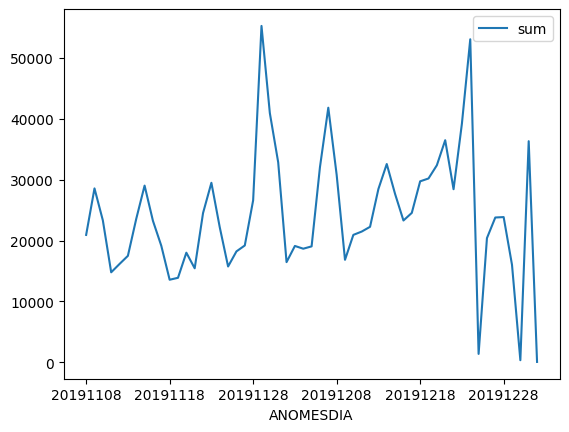

In [82]:
dfAgg[['sum']].plot()

<Axes: xlabel='ANOMESDIA'>

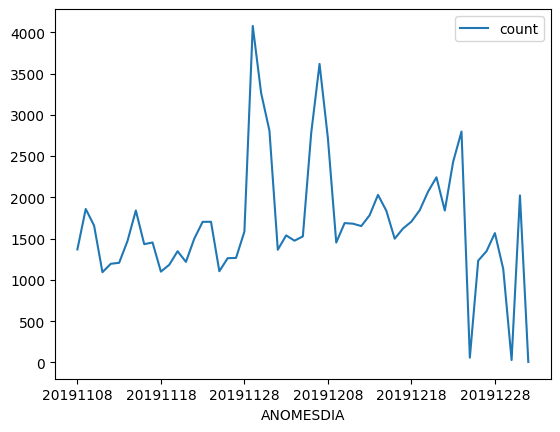

In [83]:
dfAgg[['count']].plot()